In [15]:
import ROOT
ROOT.gStyle.SetPalette(ROOT.kDarkRainBow)
ROOT.gStyle.SetHistLineWidth(2)
ROOT.gStyle.SetTitleSize(0.04,"XY")
ROOT.gStyle.SetLegendBorderSize(0)

# postprocess_ParticleTree.ipynb
---
The purpose of this analysis script is to create plots of particle kinematics from the ROOT TTree named ParticleTree. This tree is only generated when the user sets the appropriate flag in the analysis script. The tree has currently has 4 columns. These are...
- recPart (TLorentzVector)
- mcPart  (TLorentzVector)
- pid     (int)
- status  (int)

For each event, the TLorentzVectors of the reconstructed particles are saved into the recPart branch. Using the associations branch included in the Epic sims, a Monte Carlo particle can be matched to its reconstructed partner using event generator level information. If an mcPart entry is empty, this means that the reconstructed particle did not originate from the hepmc file (ex: secondaries, background, etc). The pid of the reconstructed particle is also stored. The status variable is -1 if no MCParticle match was found, 2 if the MCParticle match was the scattered electron (highest momentum particle with pid==11), and 1 otherwise.

In [16]:
# Output ROOT File and name of ParticleTree
rootfile="../out/tutorial.epic.root"
treeName="ptree"

In [17]:
# Create RDataFrame
df=ROOT.RDataFrame(treeName,rootfile)
Nele = df.Filter("status==2").Count()
Npar = df.Count()
Nmat = df.Filter("status!=-1").Count()
print(" File loaded\n","-"*50)
print(" Num Scattered Electrons = ",Nele.GetValue())
print(" Num Particles = ",Npar.GetValue())
print(" Num Matches = ",Nmat.GetValue())

 File loaded
 --------------------------------------------------
 Num Scattered Electrons =  31108
 Num Particles =  309850
 Num Matches =  294452


In [18]:
# TLatex to overlay on TCanvas
def drawLatex(xNDC,yNDC):
    latex=ROOT.TLatex()
    latex.SetTextFont(42)
    latex.SetTextSize(0.04)
    latex.DrawLatexNDC(xNDC,yNDC,"#bf{epic.22.11.2} DIS NC")
    latex.DrawLatexNDC(xNDC,yNDC-0.05,"10x100 e+p collisions")
    latex.DrawLatexNDC(xNDC,yNDC-0.1,"Q^{2} > 1 GeV^{2}")
    return

# Comparing Particle Distributions

In [19]:
# Particle histogram for both MC and Reco
def get_both_histo1d(bins,xmin,xmax,drawString,filterString):
    hmc=df.Define("mcVar","mc{}".format(drawString)).Filter(filterString).Histo1D(("hmc","",bins,xmin,xmax),"mcVar")
    hreco=df.Define("recVar","rec{}".format(drawString)).Filter(filterString).Histo1D(("hrec","",bins,xmin,xmax),"recVar")
    return hmc,hreco

In [29]:
# Queue RDataFrame histograms
hmc_e_E,hreco_e_E = get_both_histo1d(100,5,12,"Part.E()","pid==11 && status==2")
hmc_pip_E,hreco_pip_E = get_both_histo1d(100,0,15,"Part.E()","pid==211 && status==1")
hmc_pim_E,hreco_pim_E = get_both_histo1d(100,0,15,"Part.E()","pid==-211 && status==1")

hmc_e_eta,hreco_e_eta = get_both_histo1d(100,-3.5,5,"Part.Eta()","pid==11 && status==2")
hmc_pip_eta,hreco_pip_eta = get_both_histo1d(100,-5,5,"Part.Eta()","pid==211 && status==1")
hmc_pim_eta,hreco_pim_eta = get_both_histo1d(100,-5,5,"Part.Eta()","pid==-211 && status==1")

hmc_e_phi,hreco_e_phi = get_both_histo1d(100,-180,180,"Part.Phi()*180/3.14159265","pid==11 && status==2")
hmc_pip_phi,hreco_pip_phi = get_both_histo1d(100,-180,180,"Part.Phi()*180/3.14159265","pid==211 && status==1")
hmc_pim_phi,hreco_pim_phi = get_both_histo1d(100,-180,180,"Part.Phi()*180/3.14159265","pid==-211 && status==1")

## Particle Energy

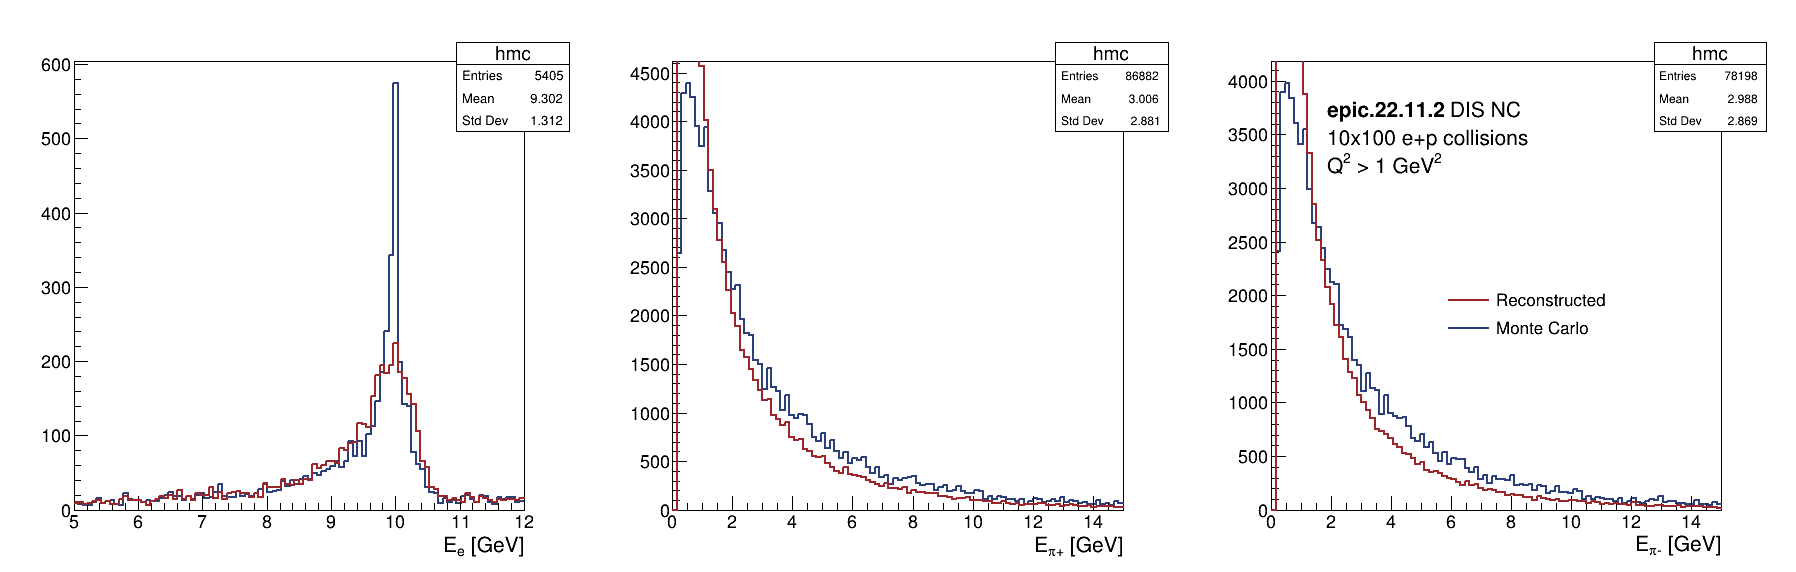

In [30]:
c=ROOT.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
hmc_e_E.GetXaxis().SetTitle("E_{e} [GeV]")
hmc_e_E.Draw("PLC")
hreco_e_E.Draw("PLC same")

c.cd(2)
hmc_pip_E.GetXaxis().SetTitle("E_{#pi+} [GeV]")
hmc_pip_E.Draw("PLC")
hreco_pip_E.Draw("PLC same")

c.cd(3)
hmc_pim_E.GetXaxis().SetTitle("E_{#pi-} [GeV]")
hmc_pim_E.Draw("PLC")
hreco_pim_E.Draw("PLC same")
legend=ROOT.TLegend(0.4,0.4,0.8,0.5)
legend.AddEntry(hreco_pim_E.GetValue(),"Reconstructed","l")
legend.AddEntry(hmc_pim_E.GetValue(),"Monte Carlo","l")
legend.Draw("same")
drawLatex(0.2,0.8)
c.Draw()

## Particle Pseudorapidity

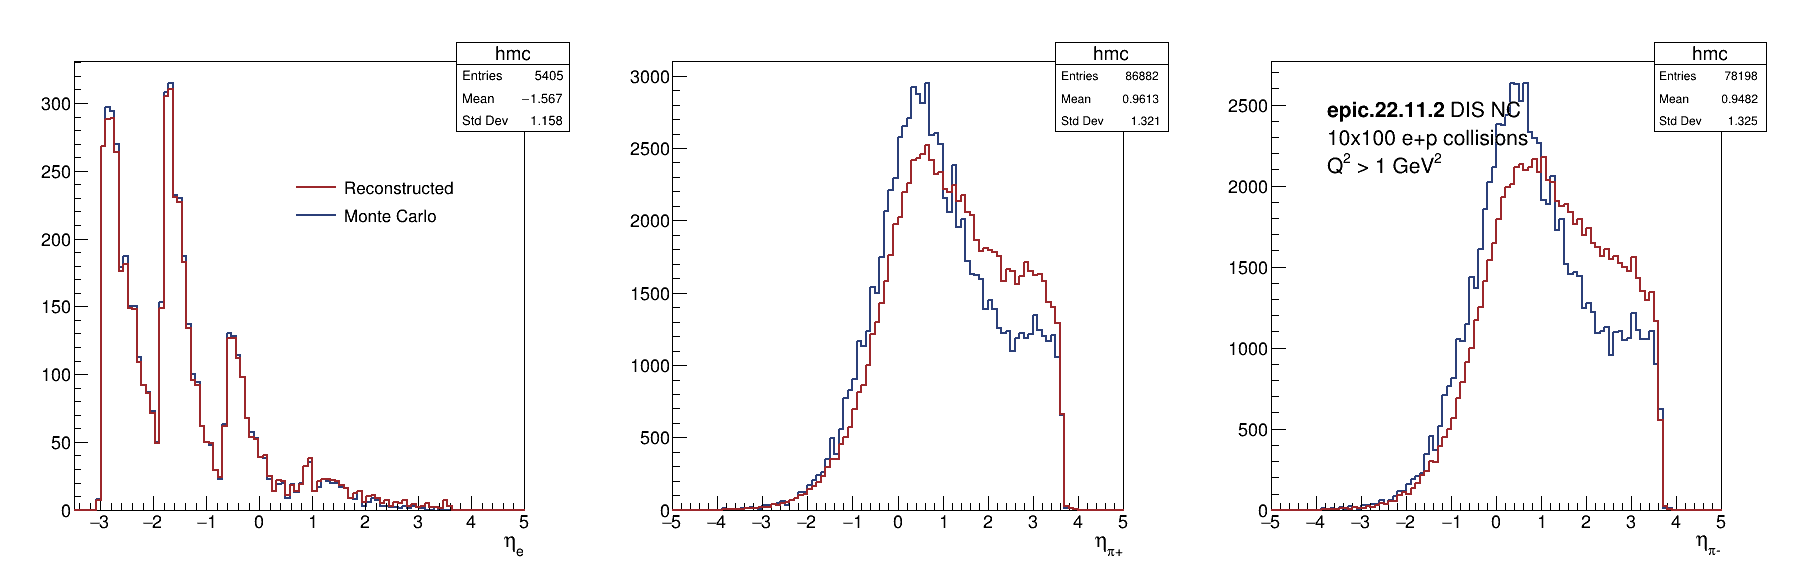

In [36]:
c=ROOT.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
hmc_e_eta.GetXaxis().SetTitle("#eta_{e}")
hmc_e_eta.Draw("PLC")
hreco_e_eta.Draw("PLC same")
legend=ROOT.TLegend(0.48,0.6,0.88,0.7)
legend.AddEntry(hreco_e_eta.GetValue(),"Reconstructed","l")
legend.AddEntry(hmc_e_eta.GetValue(),"Monte Carlo","l")
legend.Draw("same")

c.cd(2)
hmc_pip_eta.GetXaxis().SetTitle("#eta_{#pi+}")
hmc_pip_eta.Draw("PLC")
hreco_pip_eta.Draw("PLC same")

c.cd(3)
hmc_pim_eta.GetXaxis().SetTitle("#eta_{#pi-}")
hmc_pim_eta.Draw("PLC")
hreco_pim_eta.Draw("PLC same")
drawLatex(0.2,0.8)
c.Draw()

## Particle Phi

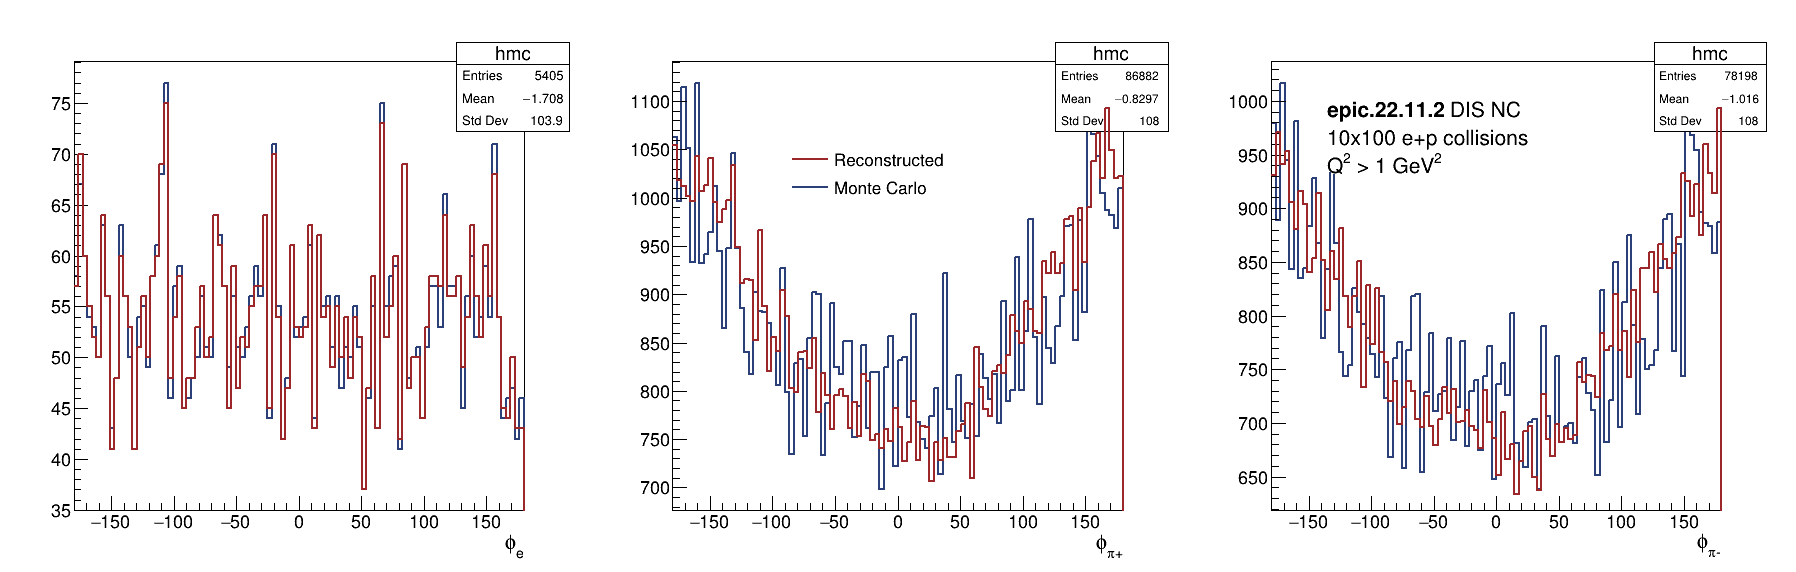

In [37]:
c=ROOT.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
hmc_e_phi.GetXaxis().SetTitle("#phi_{e}")
hmc_e_phi.Draw("PLC")
hreco_e_phi.Draw("PLC same")


c.cd(2)
hmc_pip_phi.GetXaxis().SetTitle("#phi_{#pi+}")
hmc_pip_phi.Draw("PLC")
hreco_pip_phi.Draw("PLC same")
legend=ROOT.TLegend(0.3,0.65,0.65,0.75)
legend.AddEntry(hreco_pip_phi.GetValue(),"Reconstructed","l")
legend.AddEntry(hmc_pip_phi.GetValue(),"Monte Carlo","l")
legend.Draw("same")

c.cd(3)
hmc_pim_phi.GetXaxis().SetTitle("#phi_{#pi-}")
hmc_pim_phi.Draw("PLC")
hreco_pim_phi.Draw("PLC same")
drawLatex(0.2,0.8)
c.Draw()

# Particle Resolutions

In [38]:
# Delta histogram
def get_compare_histo1d(bins,xmin,xmax,drawString,filterString):
    h=df.Define("Var",drawString).Filter(filterString).Histo1D(("h","",bins,xmin,xmax),"Var")
    return h

In [39]:
# Queue RDataFrame histograms
hres_e_E = get_compare_histo1d(100,-1,1,"recPart.E()-mcPart.E()","pid==11 && status==2")
hres_e_eta = get_compare_histo1d(100,-0.01,0.01,"recPart.Eta()-mcPart.Eta()","pid==11 && status==2")
hres_e_phi = get_compare_histo1d(100,-1,1,"(recPart.Phi()-mcPart.Phi())*180/3.14159265","pid==11 && status==2")

hres_pip_E = get_compare_histo1d(100,-0.4,0.4,"recPart.E()-mcPart.E()","pid==211 && status==1")
hres_pip_eta = get_compare_histo1d(100,-0.01,0.01,"recPart.Eta()-mcPart.Eta()","pid==211 && status==1")
hres_pip_phi = get_compare_histo1d(100,-1,1,"(recPart.Phi()-mcPart.Phi())*180/3.14159265","pid==211 && status==1")

hres_pim_E = get_compare_histo1d(100,-0.4,0.4,"recPart.E()-mcPart.E()","pid==-211 && status==1")
hres_pim_eta = get_compare_histo1d(100,-0.01,0.01,"recPart.Eta()-mcPart.Eta()","pid==-211 && status==1")
hres_pim_phi = get_compare_histo1d(100,-1,1,"(recPart.Phi()-mcPart.Phi())*180/3.14159265","pid==-211 && status==1")

## Particle Energy

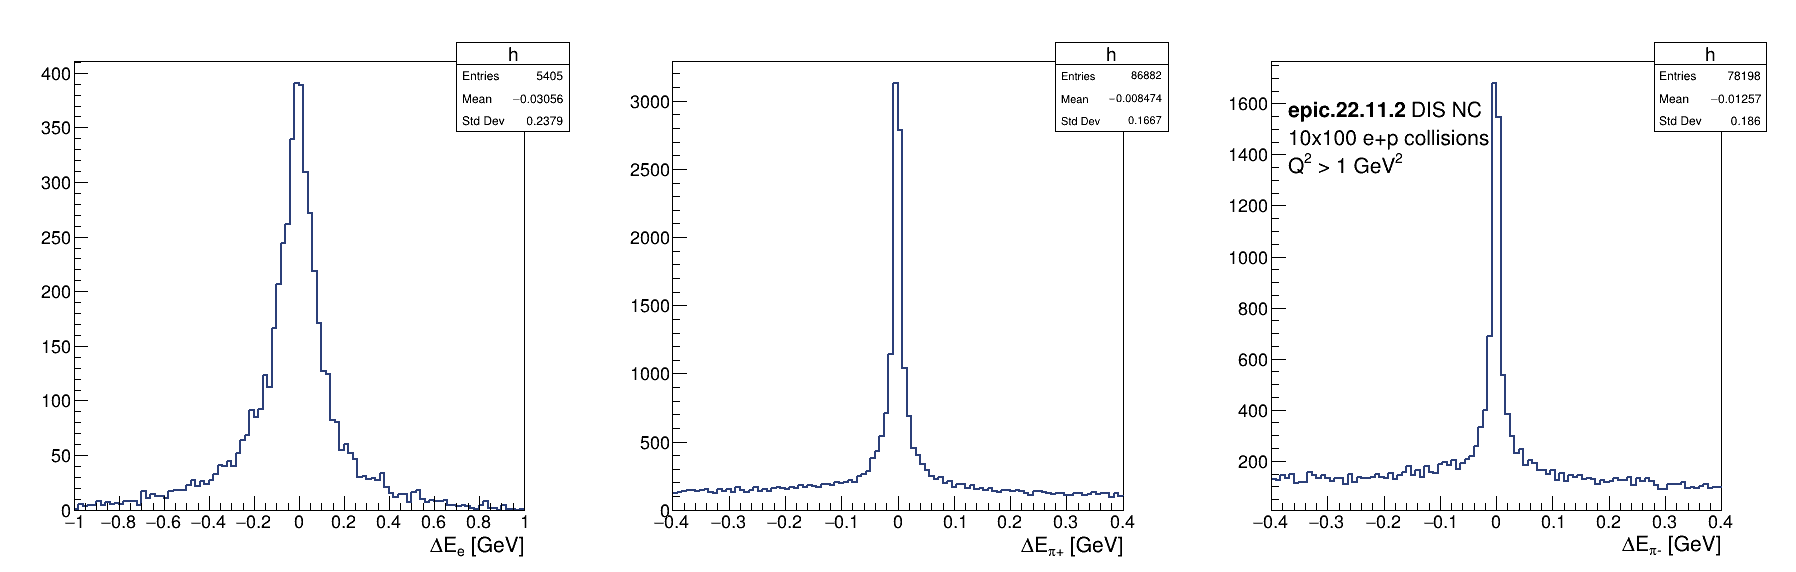

In [40]:
c=ROOT.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
hres_e_E.GetXaxis().SetTitle("#DeltaE_{e} [GeV]")
hres_e_E.Draw("PLC")
c.cd(2)
hres_pip_E.GetXaxis().SetTitle("#DeltaE_{#pi+} [GeV]")
hres_pip_E.Draw("PLC")

c.cd(3)
hres_pim_E.GetXaxis().SetTitle("#DeltaE_{#pi-} [GeV]")
hres_pim_E.Draw("PLC")
drawLatex(0.13,0.8)
c.Draw()

## Particle Pseudorapidity

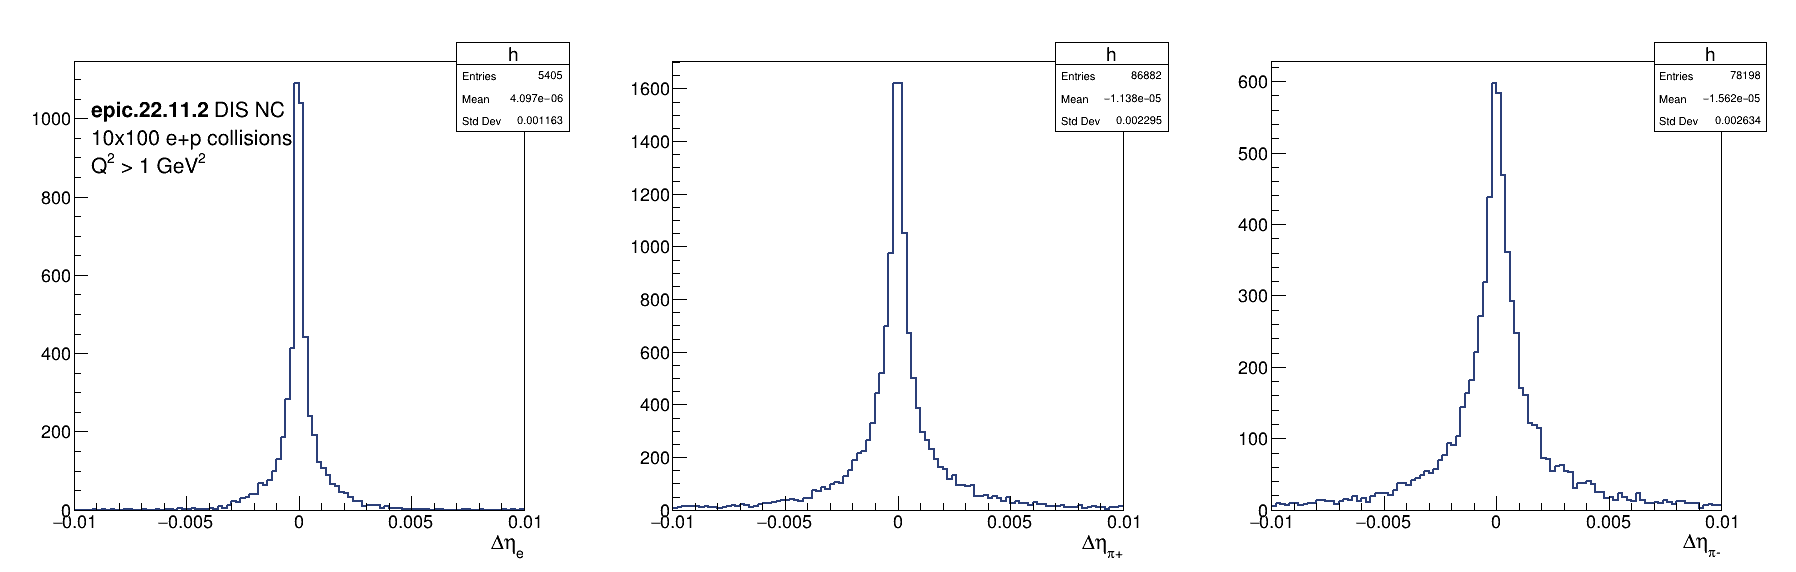

In [41]:
c=ROOT.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
hres_e_eta.GetXaxis().SetTitle("#Delta#eta_{e}")
hres_e_eta.GetXaxis().SetNdivisions(505)
hres_e_eta.Draw("PLC")
drawLatex(0.13,0.8)
c.cd(2)
hres_pip_eta.GetXaxis().SetTitle("#Delta#eta_{#pi+}")
hres_pip_eta.GetXaxis().SetNdivisions(505)
hres_pip_eta.Draw("PLC")

c.cd(3)
hres_pim_eta.GetXaxis().SetTitle("#Delta#eta_{#pi-}")
hres_pim_eta.GetXaxis().SetNdivisions(505)
hres_pim_eta.Draw("PLC")

c.Draw()

## Particle Phi

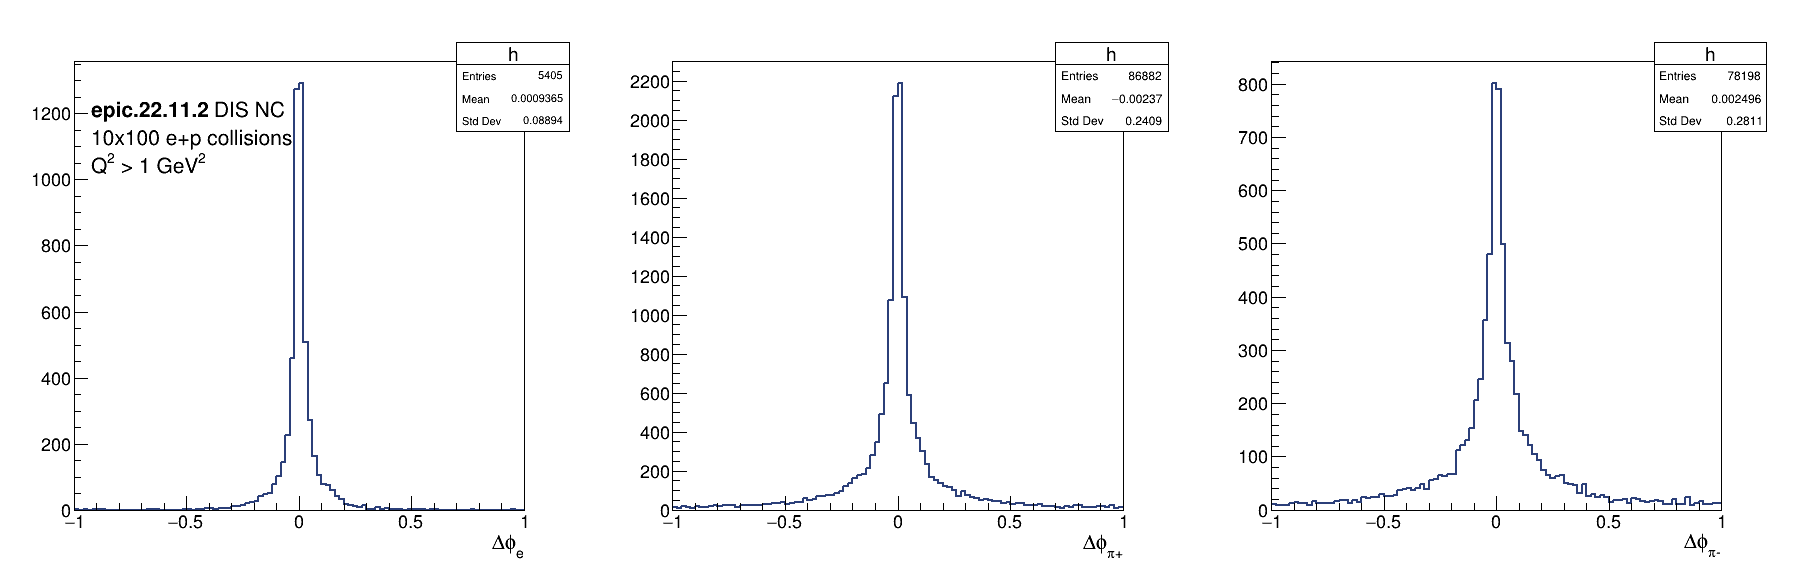

In [42]:
c=ROOT.TCanvas("c","c",1800,600)
c.Divide(3,1)
c.cd(1)
hres_e_phi.GetXaxis().SetTitle("#Delta#phi_{e}")
hres_e_phi.GetXaxis().SetNdivisions(505)
hres_e_phi.Draw("PLC")
drawLatex(0.13,0.8)
c.cd(2)
hres_pip_phi.GetXaxis().SetTitle("#Delta#phi_{#pi+}")
hres_pip_phi.GetXaxis().SetNdivisions(505)
hres_pip_phi.Draw("PLC")

c.cd(3)
hres_pim_phi.GetXaxis().SetTitle("#Delta#phi_{#pi-}")
hres_pim_phi.GetXaxis().SetNdivisions(505)
hres_pim_phi.Draw("PLC")

c.Draw()